In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("winequality-white.csv", sep=";")
data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
alcohol = data['alcohol']
data.drop(columns=['quality', 'alcohol'], inplace=True)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, alcohol, test_size=0.25, random_state=42)

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


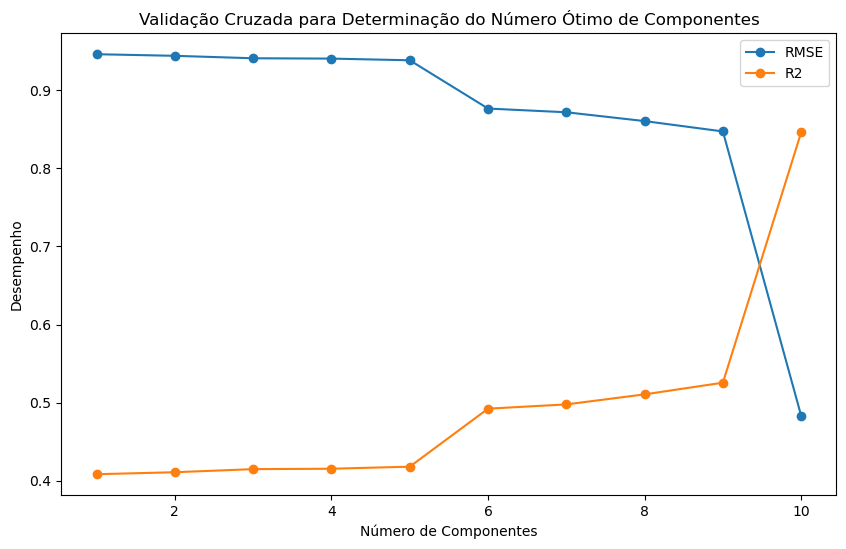

In [7]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

# Determine o número ótimo de componentes com validação cruzada
from sklearn.model_selection import cross_val_score

rmse_scores = []
r2_scores = []
components_range = range(1, X_train_scaled.shape[1] + 1)

for n_components in components_range:
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    model = LinearRegression()
    rmse = np.sqrt(-cross_val_score(model, X_train_pca, y_train, cv=5, scoring='neg_mean_squared_error').mean())
    r2 = cross_val_score(model, X_train_pca, y_train, cv=5, scoring='r2').mean()
    rmse_scores.append(rmse)
    r2_scores.append(r2)

# Plote o perfil de validação cruzada
plt.figure(figsize=(10, 6))
plt.plot(components_range, rmse_scores, marker='o', label='RMSE')
plt.plot(components_range, r2_scores, marker='o', label='R2')
plt.xlabel('Número de Componentes')
plt.ylabel('Desempenho')
plt.legend()
plt.title('Validação Cruzada para Determinação do Número Ótimo de Componentes')
plt.show()


In [8]:
optimal_components = components_range[np.argmin(rmse_scores)]
print(f"Número ótimo de componentes: {optimal_components}")
print(f"RMSE mínimo: {min(rmse_scores)}")
print(f"R2 máximo: {max(r2_scores)}")

Número ótimo de componentes: 10
RMSE mínimo: 0.48309333776003355
R2 máximo: 0.8461056462580784


In [9]:
pca = PCA(n_components=optimal_components)
X_train_final = pca.fit_transform(X_train_scaled)
X_test_final = pca.transform(X_test_scaled)

model = LinearRegression()
model.fit(X_train_final, y_train)

y_pred = model.predict(X_test_final)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
r2_test = r2_score(y_test, y_pred)

print(f"RMSE no conjunto de teste: {rmse_test}")
print(f"R2 no conjunto de teste: {r2_test}")

RMSE no conjunto de teste: 0.3786160128598259
R2 no conjunto de teste: 0.9054313780025233


RMSE no conjunto de teste: 0.3786160128598259
R2 no conjunto de teste: 0.9054313780025233


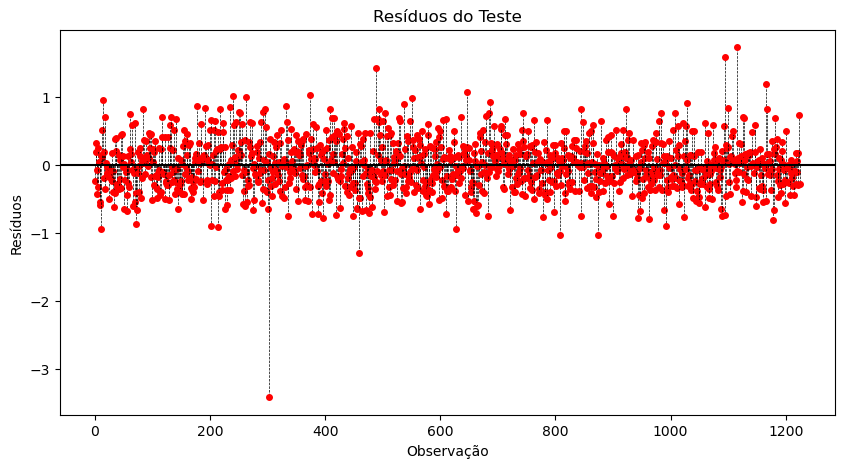

In [10]:
# Treine o modelo final com o número ótimo de componentes
pca = PCA(n_components=optimal_components)
X_train_final = pca.fit_transform(X_train_scaled)
X_test_final = pca.transform(X_test_scaled)

model = LinearRegression()
model.fit(X_train_final, y_train)

# Faça previsões no conjunto de teste
y_pred = model.predict(X_test_final)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
r2_test = r2_score(y_test, y_pred)

print(f"RMSE no conjunto de teste: {rmse_test}")
print(f"R2 no conjunto de teste: {r2_test}")

# Criando o gráfico de resíduos
residuals = y_test - y_pred
fig, ax = plt.subplots(figsize=(10, 5))
# Plotando os resíduos do teste, conectando cada ponto à linha y=0
for i, residual_value in enumerate(residuals):
    ax.plot([i, i], [0, residual_value], color='black', linestyle='--', linewidth=0.5)
    ax.plot(i, residual_value, marker='o', markersize=4, color='red')

# Adicionando uma linha horizontal y=0 para referência
ax.axhline(y=0, color='black', linestyle='-')
# Configurando labels
ax.set_xlabel('Observação')
ax.set_ylabel('Resíduos')
ax.set_title('Resíduos do Teste')

plt.show()

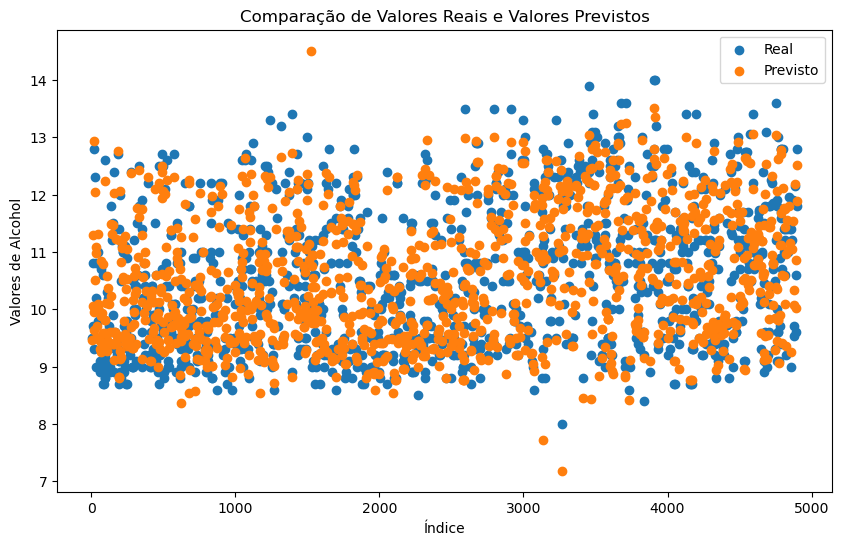

In [17]:
# Gráfico adicional de Comparação de Valores Reais e Valores Previstos

plt.figure(figsize=(10, 6))
plt.scatter(y_test.index, y_test, label='Real')
plt.scatter(y_test.index, y_pred, label='Previsto')
plt.legend()
plt.title('Comparação de Valores Reais e Valores Previstos')
plt.xlabel('Índice')
plt.ylabel('Valores de Alcohol')
plt.show()